In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix


df = pd.read_csv('samples.csv') 

df.dropna(inplace=True)


#Dropping tailnum and flightnum columns:
if 'samples.flightnum' in df.columns:
    df.drop(['samples.flightnum'], axis=1, inplace=True)
if 'samples.tailnum' in df.columns:
    df.drop(['samples.tailnum'], axis=1, inplace=True)


# Encode categorical variables
label_cols = ['samples.uniquecarrier', 'samples.origin', 'samples.dest']
for col in label_cols:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# Define features and target
feature_cols = [
    'samples.dayofmonth', 'samples.dayofweek', 'samples.deptime', 'samples.crsdeptime',
    'samples.uniquecarrier','samples.actualelapsedtime', 'samples.crselapsedtime',
    'samples.origin', 'samples.dest', 'samples.distance'
]
X = df[feature_cols]
y = df['samples.delayed']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Train SGD classifier
model = SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3, random_state=42)
model.fit(X_train, y_train)

# Validation set evaluation
print("Validation Results:")
y_pred_val = model.predict(X_val)
print(confusion_matrix(y_val, y_pred_val))
print(classification_report(y_val, y_pred_val))

# Test set evaluation
print("\nTest Results:")
y_pred_test = model.predict(X_test)
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))


Validation Results:
[[ 9702  5213]
 [ 3405 11680]]
              precision    recall  f1-score   support

           1       0.74      0.65      0.69     14915
           2       0.69      0.77      0.73     15085

    accuracy                           0.71     30000
   macro avg       0.72      0.71      0.71     30000
weighted avg       0.72      0.71      0.71     30000


Test Results:
[[ 9850  5273]
 [ 3374 11503]]
              precision    recall  f1-score   support

           1       0.74      0.65      0.69     15123
           2       0.69      0.77      0.73     14877

    accuracy                           0.71     30000
   macro avg       0.72      0.71      0.71     30000
weighted avg       0.72      0.71      0.71     30000



In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype
---  ------                     --------------   -----
 0   samples.dayofmonth         200000 non-null  int64
 1   samples.dayofweek          200000 non-null  int64
 2   samples.deptime            200000 non-null  int64
 3   samples.crsdeptime         200000 non-null  int64
 4   samples.uniquecarrier      200000 non-null  int64
 5   samples.actualelapsedtime  200000 non-null  int64
 6   samples.crselapsedtime     200000 non-null  int64
 7   samples.origin             200000 non-null  int64
 8   samples.dest               200000 non-null  int64
 9   samples.distance           200000 non-null  int64
 10  samples.delayed            200000 non-null  int64
dtypes: int64(11)
memory usage: 16.8 MB


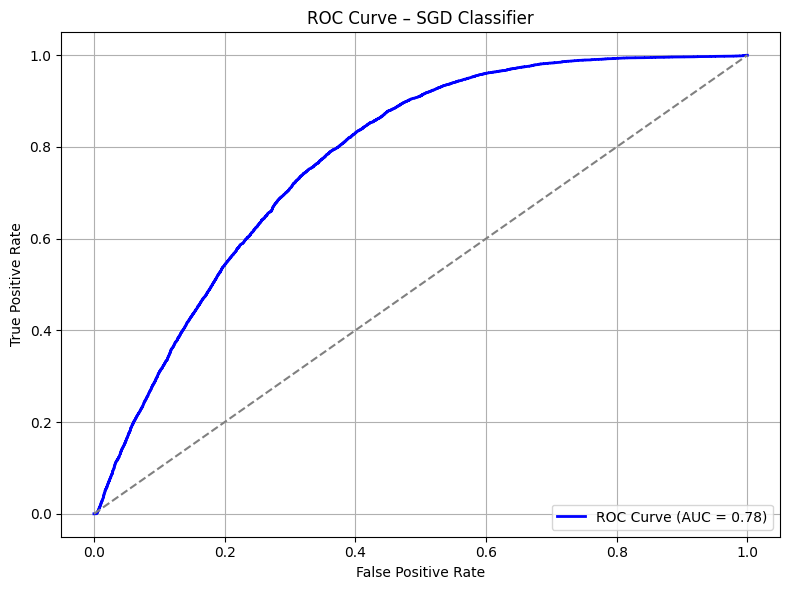

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Ensure the labels are binary (0 and 1)
y_test_binary = y_test - 1  

# ROC Curve for Test Set
if hasattr(model, 'predict_proba'):
    y_test_proba = model.predict_proba(X_test)[:, 1]  #probability for class 1 (delayed)
    fpr, tpr, thresholds = roc_curve(y_test_binary, y_test_proba)  
    roc_auc = auc(fpr, tpr)  # AUC

    # Plotting the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve – SGD Classifier')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()



In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the target data
target_df = pd.read_csv('G6_Targets.csv')

# Rename columns to match training data
target_df.rename(columns={
    'DayofMonth': 'samples.dayofmonth',
    'DayOfWeek': 'samples.dayofweek',
    'DepTime': 'samples.deptime',
    'CRSDepTime': 'samples.crsdeptime',
    'UniqueCarrier': 'samples.uniquecarrier',
    'ActualElapsedTime': 'samples.actualelapsedtime',
    'CRSElapsedTime': 'samples.crselapsedtime',
    'Origin': 'samples.origin',
    'Dest': 'samples.dest',
    'Distance': 'samples.distance'
}, inplace=True)

# Encode categorical columns
label_cols = ['samples.uniquecarrier', 'samples.origin', 'samples.dest']
for col in label_cols:
    target_df[col] = LabelEncoder().fit_transform(target_df[col].astype(str))

#  Select features
feature_cols = [
    'samples.dayofmonth', 'samples.dayofweek', 'samples.deptime', 'samples.crsdeptime',
    'samples.uniquecarrier',
    'samples.actualelapsedtime', 'samples.crselapsedtime',
    'samples.origin', 'samples.dest', 'samples.distance'
]
X_target = target_df[feature_cols]

#Transform with original scaler
X_target_scaled = scaler.transform(X_target)

# Predict using trained model
predictions = model.predict(X_target_scaled)

#Results
target_df['PredictedDelayed'] = ['Y' if pred == 1 else 'N' for pred in predictions]
target_df.to_csv('predicted_target_data.csv', index=False)
print(target_df[['PredictedDelayed']])


  PredictedDelayed
0                Y
1                N
2                N
3                Y
4                N
5                N
6                Y
7                N
8                N
9                Y
